In [63]:
import sys 
import os 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [53]:
df = pd.read_csv('../input/high_diamond_ranked_10min.csv')
y = df.blueWins

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,9879.00,4500084044.85,27573278.49,4295358071.00,4483301169.00,4510920346.00,4521733208.50,4527990640.00
blueWins,9879.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00
blueWardsPlaced,9879.00,22.29,18.02,5.00,14.00,16.00,20.00,250.00
blueWardsDestroyed,9879.00,2.82,2.17,0.00,1.00,3.00,4.00,27.00
blueFirstBlood,9879.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
blueKills,9879.00,6.18,3.01,0.00,4.00,6.00,8.00,22.00
blueDeaths,9879.00,6.14,2.93,0.00,4.00,6.00,8.00,22.00
blueAssists,9879.00,6.65,4.06,0.00,4.00,6.00,9.00,29.00
blueEliteMonsters,9879.00,0.55,0.63,0.00,0.00,0.00,1.00,2.00
blueDragons,9879.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00


In [65]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.60,17039,195,36,643,-8,19.50,1721.00,15,6,0,6,9,8,0,0,0,0,16567,6.80,17047,197,55,-643,8,19.70,1656.70
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.60,16265,174,43,-2908,-1173,17.40,1471.20,12,1,1,5,5,2,2,1,1,1,17620,6.80,17438,240,52,2908,1173,24.00,1762.00
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.40,16221,186,46,-1172,-1033,18.60,1611.30,15,3,1,11,7,14,0,0,0,0,17285,6.80,17254,203,28,1172,1033,20.30,1728.50
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.00,17954,201,55,-1321,-7,20.10,1515.70,15,2,1,5,4,10,0,0,0,0,16478,7.00,17961,235,47,1321,7,23.50,1647.80
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.00,18543,210,57,-1004,230,21.00,1640.00,17,2,1,6,6,7,1,1,0,0,17404,7.00,18313,225,67,1004,-230,22.50,1740.40


In [66]:
y.value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

In [67]:
#标注特征列
drop_cols = ['gameId', 'blueWins']
x = df.drop(drop_cols, axis= 1)

In [68]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
blueWardsPlaced,9879.00,22.29,18.02,5.00,14.00,16.00,20.00,250.00
blueWardsDestroyed,9879.00,2.82,2.17,0.00,1.00,3.00,4.00,27.00
blueFirstBlood,9879.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
blueKills,9879.00,6.18,3.01,0.00,4.00,6.00,8.00,22.00
blueDeaths,9879.00,6.14,2.93,0.00,4.00,6.00,8.00,22.00
blueAssists,9879.00,6.65,4.06,0.00,4.00,6.00,9.00,29.00
blueEliteMonsters,9879.00,0.55,0.63,0.00,0.00,0.00,1.00,2.00
blueDragons,9879.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00
blueHeralds,9879.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00
blueTowersDestroyed,9879.00,0.05,0.24,0.00,0.00,0.00,0.00,4.00


In [69]:
drop_cols = ['redFirstBlood','redKills','redDeaths'
             ,'redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin']
x.drop(drop_cols, axis=1, inplace=True)

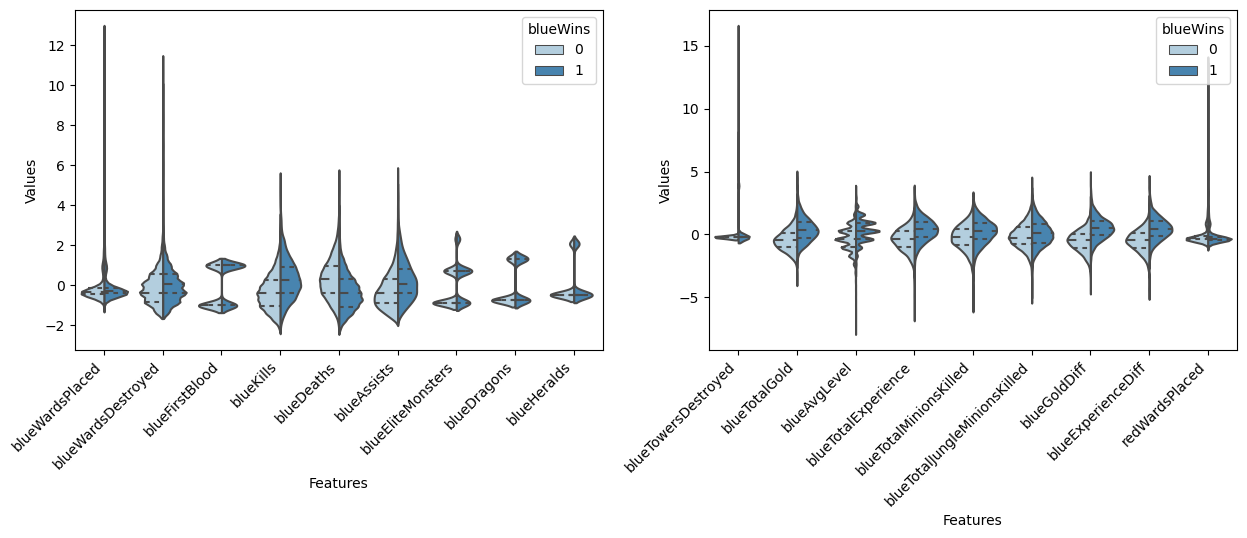

In [91]:
data = x 
data_std = (data - data.mean())/ data.std()
data = pd.concat([y, data_std.iloc[:, 0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, inner='quart', split=True, ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)

data = x 
data_std = (data - data.mean())/ data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, inner='quart', split=True, ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)
plt.show()


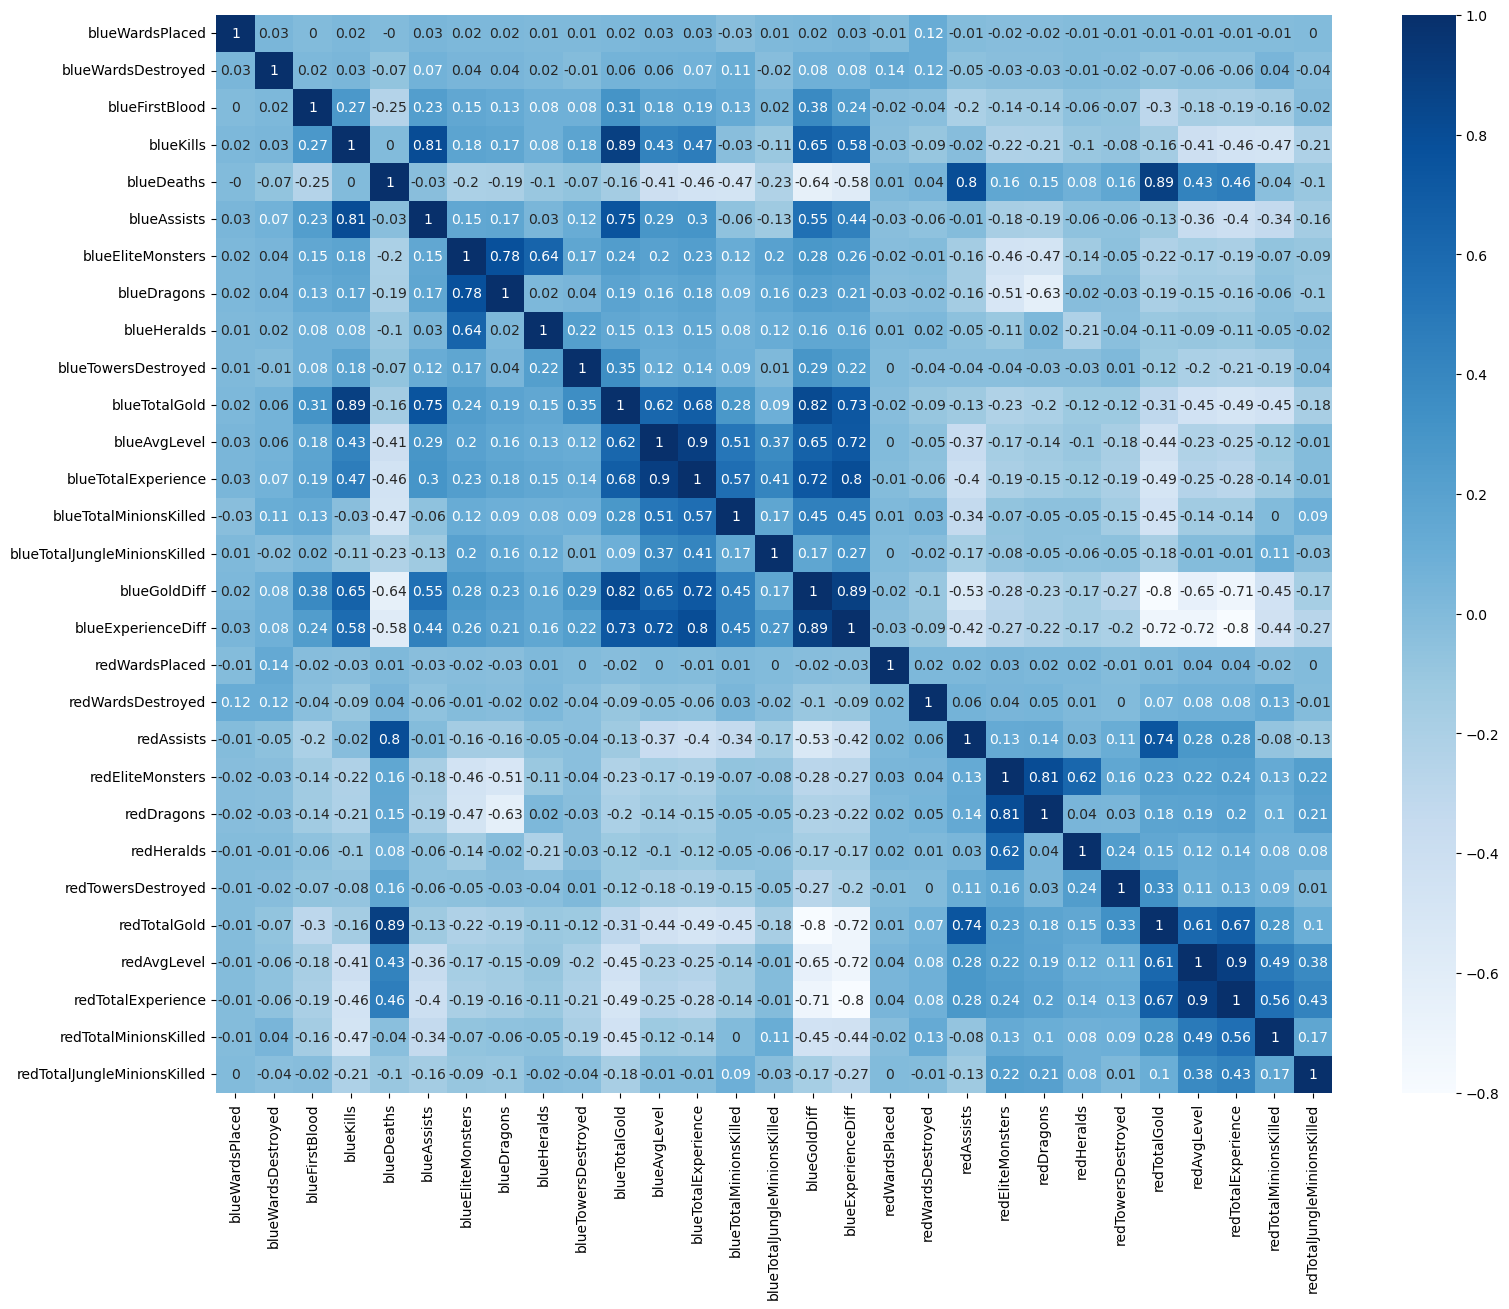

In [92]:
plt.figure(figsize=(18, 14))
sns.heatmap(round(x.corr(), 2), cmap='Blues', annot=True)
plt.show()

In [94]:
drop_cols = ['redAvgLevel', 'blueAvgLevel']
x.drop(drop_cols, axis=1, inplace=True)

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the marke

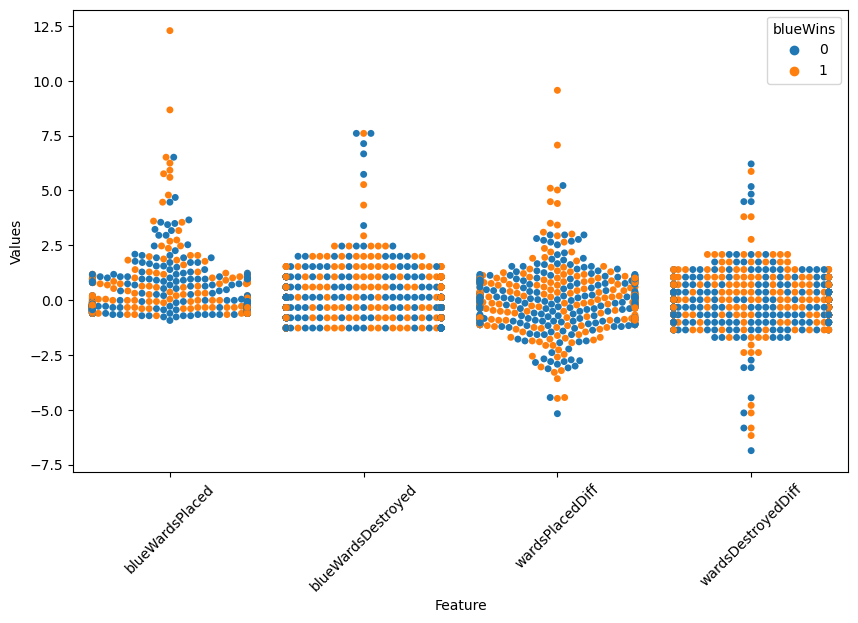

In [98]:
x['wardsPlacedDiff'] = x['blueWardsPlaced'] - x['redWardsPlaced']
x['wardsDestroyedDiff'] = x['blueWardsDestroyed'] - x['redWardsDestroyed']

data = x[['blueWardsPlaced', 'blueWardsDestroyed', 'wardsPlacedDiff', 'wardsDestroyedDiff']].sample(1000)
data_std = (data -data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Feature', value_name='Values')

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Feature', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()


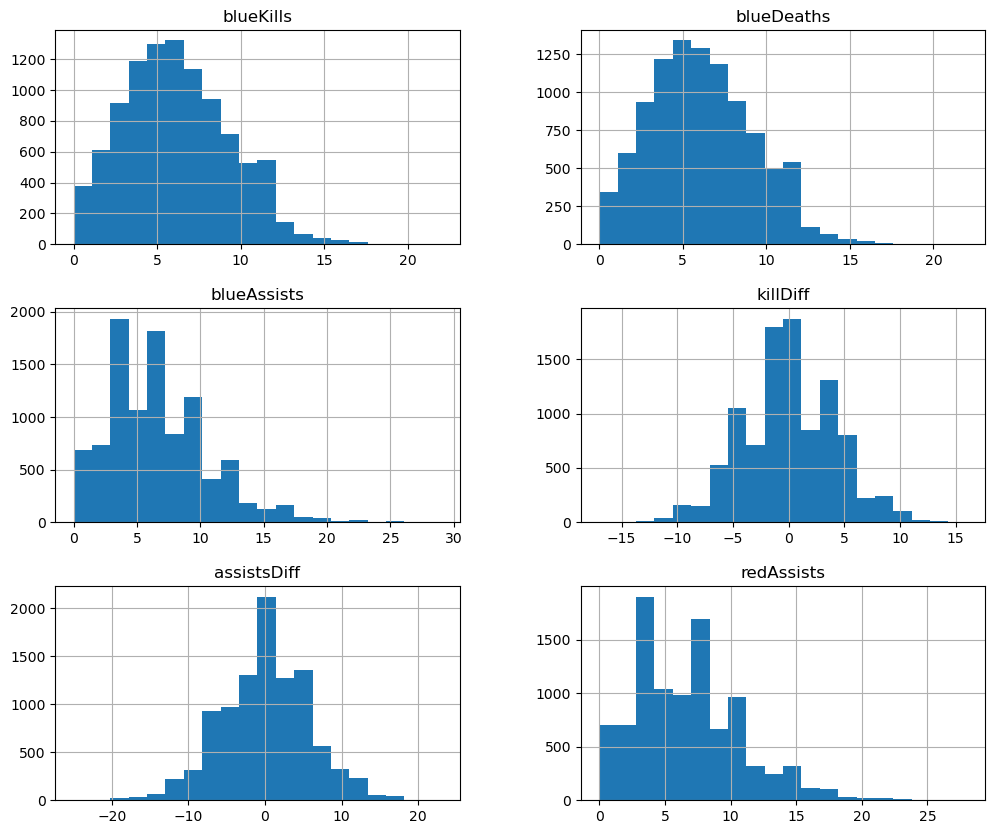

In [100]:
x['killDiff'] = x['blueKills'] - x['blueDeaths']
x['assistsDiff'] = x['blueAssists'] - x['redAssists']
x[['blueKills', 'blueDeaths', 'blueAssists', 'killDiff', 'assistsDiff', 'redAssists']].hist(figsize=(12, 10), bins=20)
plt.show()


D:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 73.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.4% of the points cannot be placed; you may want to decrease the size of the marke

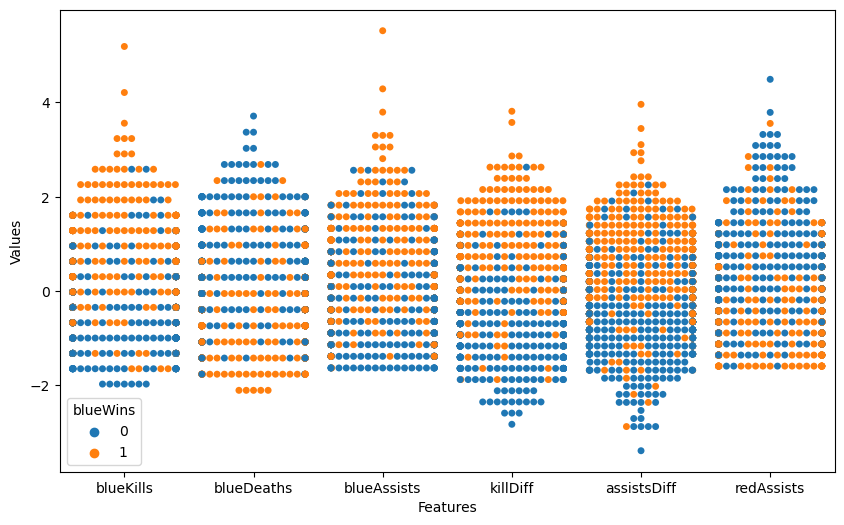

In [101]:
data = x[['blueKills', 'blueDeaths', 'blueAssists', 'killDiff', 'assistsDiff', 'redAssists']].sample(1000)
data_std = (data - data.mean())/data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', value_name='Values', var_name='Features')

plt.figure(figsize=(10, 6))
sns.swarmplot(data, x='Features', y='Values', hue='blueWins')
plt.show()

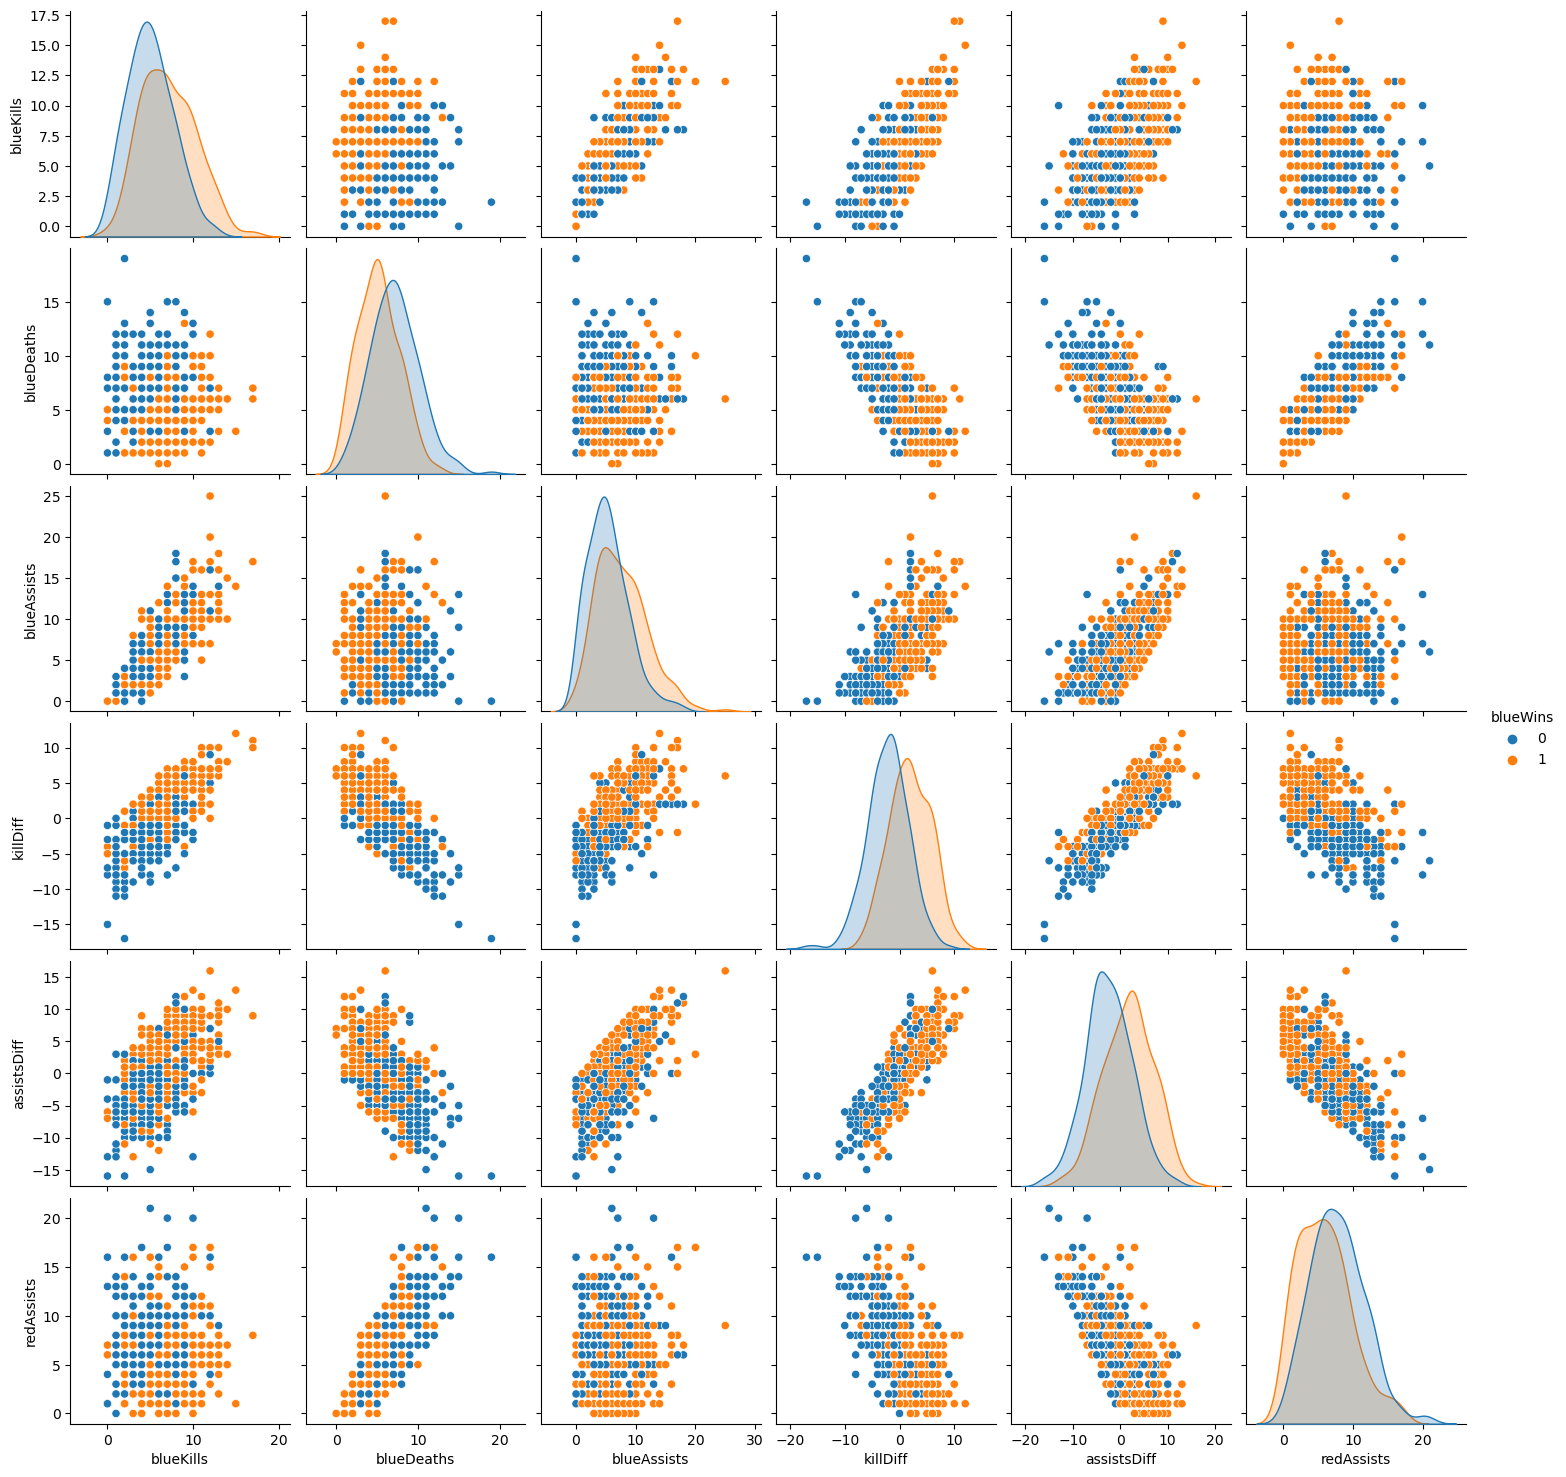

In [102]:
data = pd.concat([y, x], axis=1).sample(500)
sns.pairplot(data, vars=['blueKills', 'blueDeaths', 'blueAssists', 'killDiff', 'assistsDiff', 'redAssists'], hue='blueWins')
plt.show()

eliteDiff
-2   0.29
-1   0.37
 0   0.50
 1   0.63
 2   0.74
Name: blueWins, dtype: float64
dragonsDiff
-1   0.37
 0   0.50
 1   0.64
Name: blueWins, dtype: float64
heraldsDiff
-1   0.39
 0   0.50
 1   0.60
Name: blueWins, dtype: float64


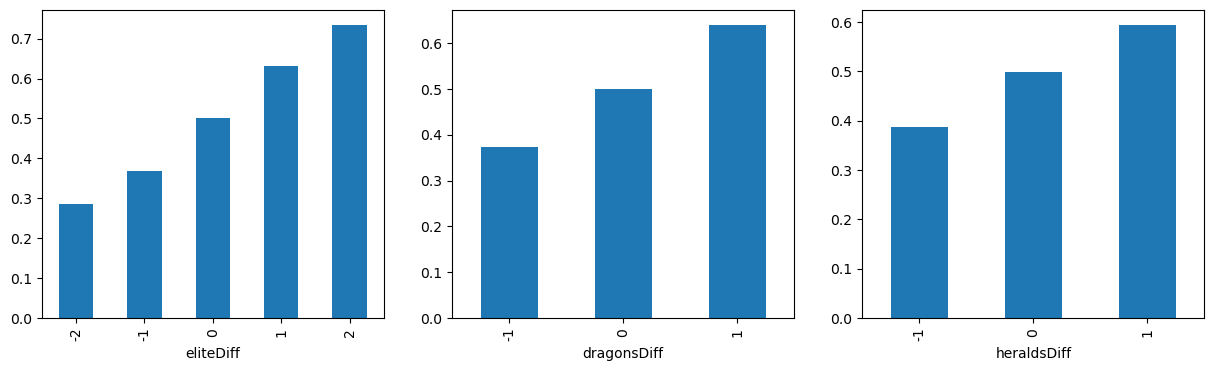

In [103]:
x['dragonsDiff']  = x['blueDragons'] - x['redDragons']
x['heraldsDiff'] = x['blueHeralds'] - x['redHeralds']
x['eliteDiff'] = x['blueEliteMonsters'] - x['redEliteMonsters']

data = pd.concat([y, x], axis=1)
eliteGroup = data.groupby('eliteDiff')['blueWins'].mean()
dragonGroup = data.groupby('dragonsDiff')['blueWins'].mean()
heraldGroup = data.groupby('heraldsDiff')['blueWins'].mean()

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
eliteGroup.plot(kind='bar', ax=ax[0])
dragonGroup.plot(kind='bar', ax=ax[1])
heraldGroup.plot(kind='bar', ax=ax[2])

print(eliteGroup)
print(dragonGroup)
print(heraldGroup)

plt.show()

towerDiff
-2      27
-1     347
 0    9064
 1     406
 2      28
 3       6
 4       1
Name: blueWins, dtype: int64
towerDiff
-2   0.19
-1   0.22
 0   0.50
 1   0.74
 2   0.96
 3   1.00
 4   1.00
Name: blueWins, dtype: float64


Text(0, 0.5, 'Count')

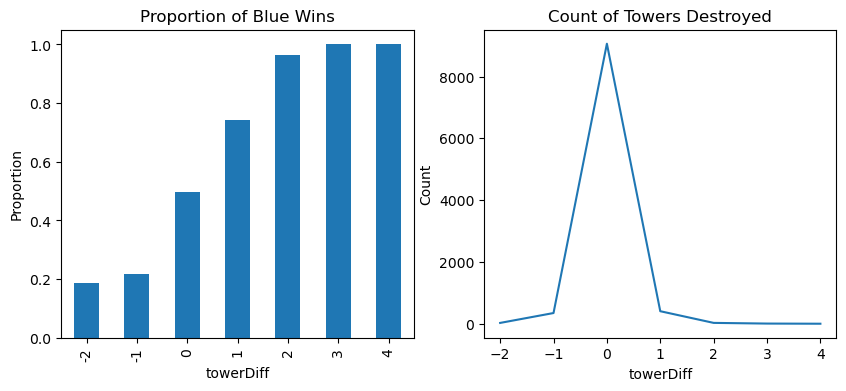

In [104]:
x['towerDiff'] = x['blueTowersDestroyed'] - x['redTowersDestroyed']

data = pd.concat([y, x], axis=1)
towerGroup = data.groupby('towerDiff')['blueWins']

print(towerGroup.count())
print(towerGroup.mean())

fig, ax = plt.subplots(1, 2, figsize = (10, 4))
towerGroup.mean().plot(kind='bar', ax = ax[0])
ax[0].set_title('Proportion of Blue Wins')
ax[0].set_ylabel('Proportion')

towerGroup.count().plot(kind='line', ax=ax[1])
ax[1].set_title('Count of Towers Destroyed')
ax[1].set_ylabel('Count')


### step5: 利用LightGbm进行训练和预测

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
data_target_part = y 
data_features_part = x 
x_train,x_test,y_train,y_test = train_test_split(data_features_part, data_target_part, test_size=0.2, random_state=2020)

In [109]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [108]:
clf = LGBMClassifier()
clf.fit(x_train, y_train)

LGBMClassifier()

The accuray of lgb is: 0.855244843730229
The accuray of lgb is: 0.7236842105263158
The confusion matrix result:
 [[711 252]
 [294 719]]


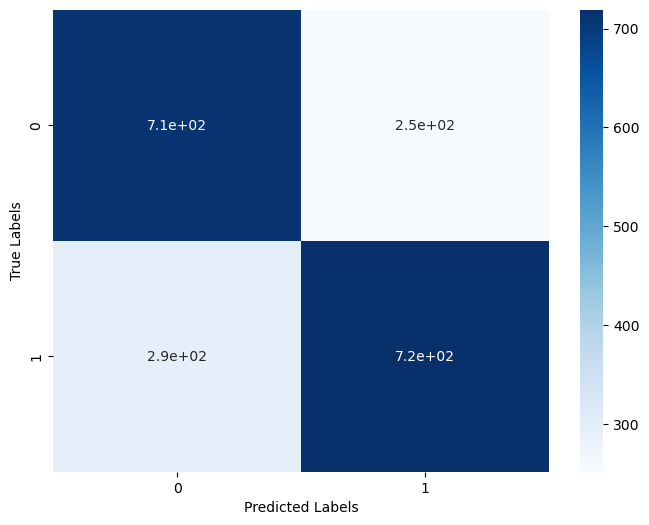

In [110]:
train_pre = clf.predict(x_train)
test_pre = clf.predict(x_test)

print('The accuray of lgb is:', accuracy_score(y_train, train_pre))
print('The accuray of lgb is:', accuracy_score(y_test, test_pre))

confusion_matrix_result = confusion_matrix(y_test, test_pre)
print('The confusion matrix result:\n', confusion_matrix_result)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<Axes: >

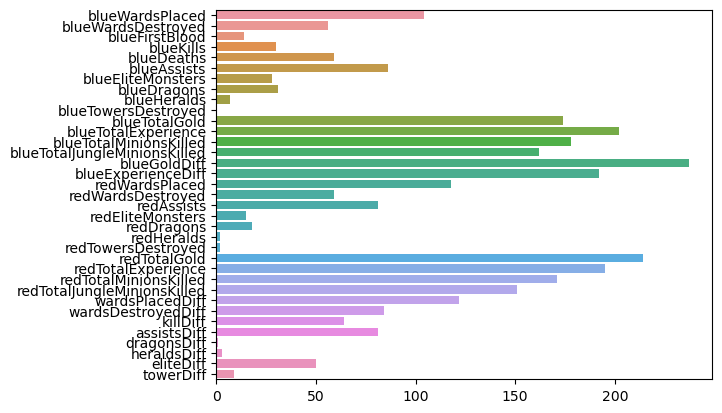

In [111]:
sns.barplot(y=data_features_part.columns, x = clf.feature_importances_)

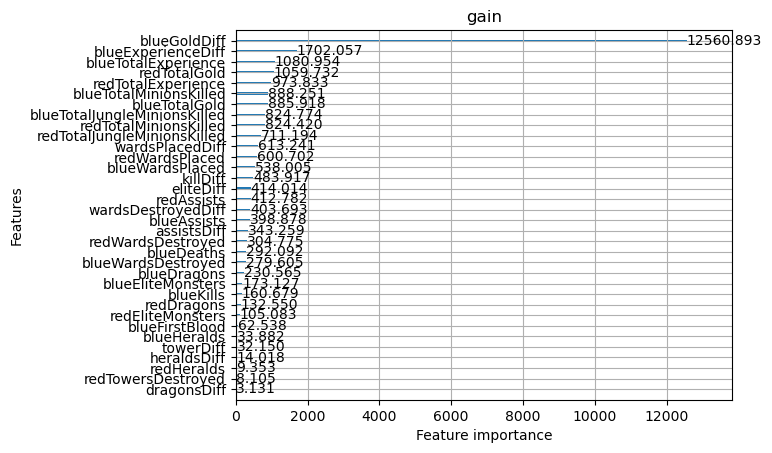

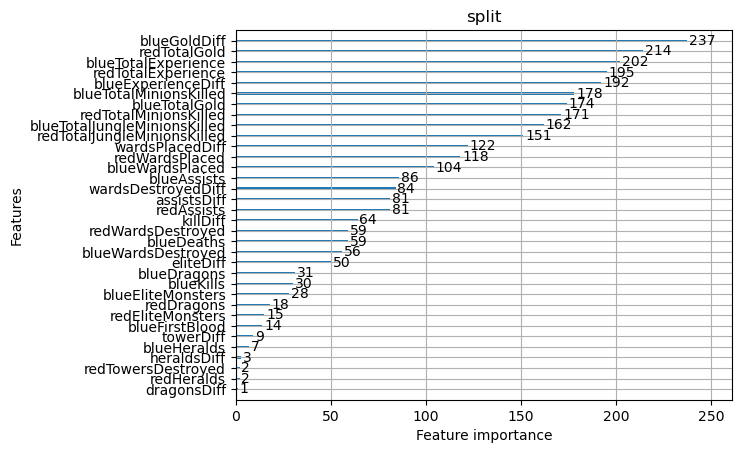

acc = 0.7236842105263158


In [112]:
from lightgbm import plot_importance

def estimate(model, data):
    ax1 = plot_importance(model, importance_type='gain')
    ax1.set_title('gain')
    ax2 = plot_importance(model, importance_type='split')
    ax2.set_title('split')
    plt.show()

def classes(data, label, test):
    model = LGBMClassifier()
    model.fit(data, label)
    ans = model.predict(test)
    estimate(model=model, data=data)
    return ans 

ans = classes(x_train, y_train, x_test)
pre = accuracy_score(y_test, ans)
print('acc =', accuracy_score(y_test, ans))

In [113]:
## 从sklearn库中导入网格调参函数
from sklearn.model_selection import GridSearchCV

## 定义参数取值范围
learning_rate = [0.1, 0.3, 0.6]
feature_fraction = [0.5, 0.8, 1]
num_leaves = [16, 32, 64]
max_depth = [-1,3,5,8]

parameters = { 'learning_rate': learning_rate,
              'feature_fraction':feature_fraction,
              'num_leaves': num_leaves,
              'max_depth': max_depth}
model = LGBMClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy',verbose=3, n_jobs=-1)
clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1


In [114]:
clf.best_params_

{'feature_fraction': 1, 'learning_rate': 0.1, 'max_depth': 3, 'num_leaves': 16}

The accuray of lgb is: 0.7495887637605972
The accuray of lgb is: 0.729251012145749
The confusion matrix result:
 [[728 235]
 [300 713]]


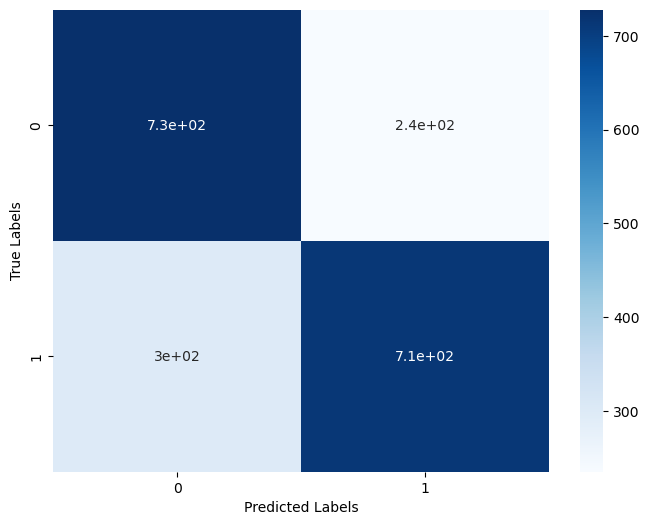

In [115]:
best_clf = LGBMClassifier(**clf.best_params_)
best_clf.fit(x_train, y_train)

train_pre = best_clf.predict(x_train)
test_pre = best_clf.predict(x_test)

print('The accuray of lgb is:', accuracy_score(y_train, train_pre))
print('The accuray of lgb is:', accuracy_score(y_test, test_pre))

confusion_matrix_result = confusion_matrix(y_test, test_pre)
print('The confusion matrix result:\n', confusion_matrix_result)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

$$score = \frac{1}{n}\sum_{1}^{n}(y_i-y^*)^2$$